# Refine the Data

In [2]:
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import re

In [3]:
items_raw = pd.read_csv("data/items_raw.csv")
item_features = pd.read_csv("data/item_features.csv")

In [4]:
items_raw["release_date"] = pd.to_datetime(items_raw.release_date, infer_datetime_format=True)
items_raw["year"] = items_raw.release_date.apply(lambda x: str(x.year))

In [5]:
items_main = items_raw.drop(['video_release_date', 'release_date', 'imdb_url'], axis=1).copy()

In [6]:
items_addtl = item_features[['overview', 'original_language', 'runtime', 'vote_average', 'vote_count', "movie_id"]].copy()

In [7]:
items = pd.merge(left=items_main, right=items_addtl, on="movie_id", how="left")

In [8]:

items.head()

,movie_id,title,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,SciFi,Thriller,War,Western,year,overview,original_language,runtime,vote_average,vote_count
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,1995,"Led by Woody, Andy's toys live happily in his ...",en,81.0,7.968,18757.0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,1,0,0,1995,When a powerful satellite system falls into th...,en,130.0,6.900,3990.0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,1,0,0,1995,It's Ted the Bellhop's first night on the job....,en,98.0,5.859,2686.0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,1995,Chili Palmer is a Miami mobster who gets sent ...,en,105.0,6.495,1090.0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,1,0,0,1995,An agoraphobic psychologist and a female detec...,en,124.0,6.507,995.0


In [9]:
items.overview.isna().sum()

np.int64(11)

In [10]:

items.overview.fillna("None", inplace=True)

## Getting the sentence vector

In [11]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [12]:
doc = nlp(items["overview"][0])

In [13]:
doc.vector

array([ 2.49380805e-02,  1.74549282e-01, -9.29457471e-02, -4.02068421e-02,
        2.45584920e-02,  2.10599136e-02,  4.59955782e-02, -1.43892854e-01,
        2.23628674e-02,  2.10939479e+00, -1.11910768e-01, -7.78442621e-02,
       -5.78953363e-02, -5.18039986e-02, -4.90232185e-02, -3.90546210e-02,
       -1.63908191e-02,  7.56938040e-01, -1.07308537e-01, -1.58448797e-02,
       -3.28326374e-02, -4.18951176e-02, -2.36957222e-02, -4.90324982e-02,
        3.45998853e-02, -5.01969596e-04, -7.33386278e-02,  8.14125240e-02,
        1.23276107e-03, -3.94272059e-02, -4.45753373e-02,  9.23748016e-02,
       -1.85925841e-01,  1.29784733e-01,  6.92790821e-02, -8.13476965e-02,
        3.25000323e-02,  8.13459679e-02, -4.94984947e-02, -1.00935347e-01,
        8.89295489e-02,  2.81169247e-02,  8.77274945e-03, -3.19957659e-02,
        7.94582665e-02,  9.91719663e-02, -1.07840024e-01, -5.39268330e-02,
       -3.52545083e-02,  1.26066720e-02,  3.39749381e-02, -7.42770284e-02,
       -5.82755692e-02, -

In [14]:
def word_vec(sentence):
    doc = nlp(sentence)
    return doc.vector

In [15]:
%%time
overview_embedding = items["overview"].apply(word_vec)

CPU times: total: 29.1 s
Wall time: 29.2 s


In [16]:
overview_embedding = overview_embedding.to_list()

In [17]:
overview_embedding_list = []
for vec in overview_embedding:
    overview_embedding_list.append(vec.tolist())

In [18]:
len(overview_embedding_list)

1746

In [19]:
overview_embedding_df = pd.DataFrame(overview_embedding_list)

In [20]:
overview_embedding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.024938,0.174549,-0.092946,-0.040207,0.024558,0.021060,0.045996,-0.143893,0.022363,2.109395,...,-0.164214,0.073254,0.071066,0.005870,-0.047621,-0.005115,0.025926,-0.035420,-0.059641,-0.004321
1,-0.089016,0.133057,-0.047937,0.057266,0.059098,-0.080577,-0.081909,-0.048002,-0.089832,2.023080,...,-0.130069,0.047367,-0.007689,-0.009476,-0.108971,0.089635,0.042942,-0.067380,-0.047274,-0.021157
2,0.024798,0.201679,-0.035214,-0.044371,0.065224,0.011609,-0.008056,-0.141306,0.003372,2.377326,...,-0.125685,0.043005,0.087619,-0.073365,0.035089,-0.006726,-0.003821,-0.012937,-0.014347,0.046458
3,-0.044721,0.126973,-0.104857,-0.019217,0.138141,0.091052,0.026251,-0.202099,0.047526,2.029502,...,-0.125688,0.038220,0.011013,0.041688,0.000462,-0.014254,-0.015342,-0.110975,-0.009556,0.053125
4,0.080059,-0.017512,-0.176883,0.082077,0.056057,-0.022036,-0.042583,-0.109661,0.073444,2.139982,...,-0.184866,0.007139,0.070511,0.089315,0.028993,-0.071459,0.047445,-0.044927,-0.102735,-0.100472


In [21]:
items.columns

Index(['movie_id', 'title', 'genre_unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Thriller', 'War', 'Western', 'year', 'overview',
       'original_language', 'runtime', 'vote_average', 'vote_count'],
      dtype='object')

In [22]:
item_similarity_df = pd.concat([
    items[['movie_id', 'genre_unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'SciFi', 'Thriller', 'War', 'Western']], 
    overview_embedding_df],
    axis=1)

In [23]:
item_similarity_df.head()

,movie_id,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,290,291,292,293,294,295,296,297,298,299
0,1,0,0,0,1,1,1,0,0,0,...,-0.164214,0.073254,0.071066,0.005870,-0.047621,-0.005115,0.025926,-0.035420,-0.059641,-0.004321
1,2,0,1,1,0,0,0,0,0,0,...,-0.130069,0.047367,-0.007689,-0.009476,-0.108971,0.089635,0.042942,-0.067380,-0.047274,-0.021157
2,3,0,0,0,0,0,0,0,0,0,...,-0.125685,0.043005,0.087619,-0.073365,0.035089,-0.006726,-0.003821,-0.012937,-0.014347,0.046458
3,4,0,1,0,0,0,1,0,0,1,...,-0.125688,0.038220,0.011013,0.041688,0.000462,-0.014254,-0.015342,-0.110975,-0.009556,0.053125
4,5,0,0,0,0,0,0,1,0,1,...,-0.184866,0.007139,0.070511,0.089315,0.028993,-0.071459,0.047445,-0.044927,-0.102735,-0.100472


## Build nearest neighbor model

In [24]:
from reco.recommend import get_similar
from sklearn.neighbors import NearestNeighbors, VALID_METRICS
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

In [25]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

In [26]:
def get_similar(embedding, k):
    model_similar_items = NearestNeighbors(n_neighbors=k, metric="cosine",
                                           algorithm="brute").fit(embedding)
    distances, indices = model_similar_items.kneighbors(embedding)
    
    return distances, indices

In [27]:
%%time
item_distances, item_similar_indices = get_similar(overview_embedding_df, 5)

CPU times: total: 500 ms
Wall time: 107 ms


In [28]:
item_similar_indices

array([[   0, 1166, 1366, 1417, 1465],
       [   1,  862,  419,  391, 1121],
       [   2,  976,  494,  161, 1261],
       ...,
       [1743, 1742, 1473, 1472, 1349],
       [1744,  835,   47,   25, 1109],
       [1745, 1032,  612,  610, 1066]])

In [31]:
def show_similar(item_index, item_similar_indices):
    
    movie_ids = item_similar_indices[item_index]
    
    images = []
    for movie_id in movie_ids:
        img_path = 'data/posters/' + str(movie_id+1) + '.0.jpg'  # Changed to .0.jpg
        try:
            images.append(mpimg.imread(img_path))
        except FileNotFoundError:
            print(f"Image not found: {img_path}")
            # Try without the .0 if needed
            try:
                img_path = 'data/posters/' + str(movie_id+1) + '.jpg'
                images.append(mpimg.imread(img_path))
            except FileNotFoundError:
                print(f"Alternative path also not found: {img_path}")
    
    if not images:
        print("No images found to display")
        return
        
    plt.figure(figsize=(20,10))
    columns = 5
    rows = (len(images) // columns) + (1 if len(images) % columns > 0 else 0)  # Integer division
    
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)  # Fixed to use integer rows
        plt.axis('off')
        plt.imshow(image)
    
    plt.tight_layout()
    plt.show()

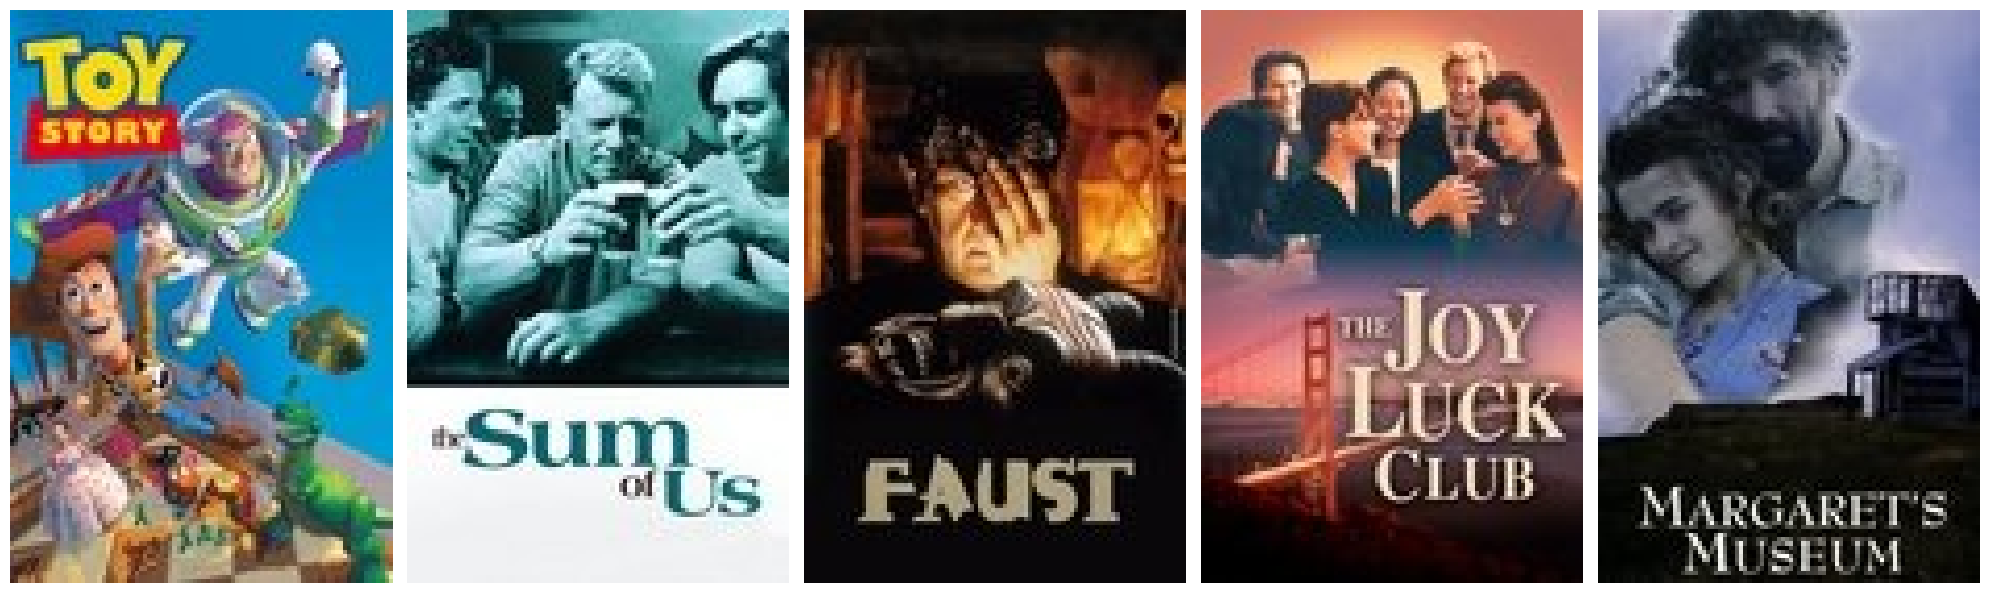

In [33]:
show_similar(0, item_similar_indices)